# Résultats de Copilot et Codex sur les datasets HumanEval et Leetcode

In [75]:
%matplotlib inline
import json
import os
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from ipywidgets import IntProgress
from utils import pass_k, pass_at_k
plt.style.use(['ieee','science'])

Import the results of the Copilot and Codex experiments.

In [17]:
with open('humaneval/results.json', 'r') as f:
    humaneval = json.load(f)

with open('leetcode/results.json', 'r') as f:
    leetcode = json.load(f)

#### Variable indépendantes

- Prompt : Context du modèle (avec doc, modififé, signature caché, ...)
- Température : Parametre de température du modèle (disponible uniquement sur Codex)
- Nombre d'essai (K) : nombre de résultats générés (disponible que sur Codex + HumanEval)
- Langage de programmation : Python, Java, C, ... (dispo Leetcode)
- Dataset : Leetcode, HumanEval
- Modèle : Copilot, Codex

#### Variable dépendante

- pass @k : pour k>1, il faut K>1
- Premier test réussi (K>1)
- % de test réussi (Leetcode)
- Status du résultat (Leetcode)

## Plots

### pass@1(%) of Copilot&Codex on several modification of HumanEval

In [18]:
data = {
    'copilot': {
        variation.replace(".json", ""):
        round(100*(sum([problem['success'] for problem in humaneval['1.0']['copilot'][variation].values()]) / len(humaneval['1.0']['copilot'][variation])), 2)
        for variation in humaneval['1.0']['copilot']
    },
    'codex': {
        variation.replace(".json", ""):
        round(100*(sum([problem['success'] for problem in humaneval['1.0']['codex'][variation].values()]) / len(humaneval['1.0']['codex'][variation])), 2)
        for variation in humaneval['1.0']['codex']
    },
    'codex-pass@1': {
        variation.replace(".json", ""):
        round(100*(pass_k([p['total'] for p in humaneval['1.0']['codex_100'][variation].values()],100,1)), 2)
        for variation in humaneval['1.0']['codex_100']
    },
    'codex-pass@10': {
        variation.replace(".json", ""):
        round(100*(pass_k([p['total'] for p in humaneval['1.0']['codex_100'][variation].values()],100,10)), 2)
        for variation in humaneval['1.0']['codex_100']
    },
    'codex-pass@100': {
        variation.replace(".json", ""):
        round(100*(pass_k([p['total'] for p in humaneval['1.0']['codex_100'][variation].values()],100,100)), 2)
        for variation in humaneval['1.0']['codex_100']
    },
}

df = pd.DataFrame(data)
display(df)

,copilot,codex,codex-pass@1,codex-pass@10,codex-pass@100
author_jbd,17.68,26.83,24.16,70.13,98.17
keyword_cut_02,29.27,NaN,NaN,NaN,NaN
nodoc,8.54,6.10,7.74,28.30,64.02
original,31.10,17.68,22.44,71.70,98.78
signature_name,30.49,16.46,19.76,67.84,98.17
complexity,16.46,25.00,22.85,70.69,96.34
no_example,30.49,18.29,17.89,58.65,87.80
fr,26.22,14.02,16.63,58.62,90.85
cat,26.83,17.68,16.24,55.92,87.80
algorithm,27.44,17.07,16.98,60.09,93.90


### pass@1(%) of Copilot&Codex on 3 modification of Leetcode by language

In [19]:
data = {}
for engine in leetcode['1.0']:
    for variation in leetcode['1.0'][engine]:
        name = f"{engine}_{variation}"
        data[name] = {}
        for lang in leetcode['1.0'][engine][variation]:
            accepted = 0
            for problem in leetcode['1.0'][engine][variation][lang]:
                if leetcode['1.0'][engine][variation][lang][problem]['status_msg'] == 'Accepted':
                    accepted += 1
            data[name][lang] = f"{round((accepted/len(leetcode['1.0'][engine][variation][lang]))*100, 1)}%"
            
df = pd.DataFrame(data)
display(df)

,codex_masked,codex_no_doc,codex_original,copilot_masked,copilot_no_doc,copilot_original
javascript,17.3%,28.7%,32.3%,30.0%,25.3%,37.3%
java,28.7%,44.3%,39.3%,32.3%,43.7%,46.3%
csharp,14.0%,31.0%,33.7%,28.3%,44.3%,44.3%
python3,16.3%,41.0%,30.3%,19.0%,34.3%,33.7%
c,9.0%,11.7%,18.3%,14.3%,16.0%,18.7%
cpp,26.0%,46.0%,41.3%,26.7%,41.3%,45.3%


## Questions

### Copilot vs Codex

#### HumanEval with Codex temperature variation

In [20]:
data = {
    'codex': {
        temperature:
        round(100*(sum([problem['success'] for problem in humaneval[temperature]['codex']['original.json'].values()]) / len(humaneval[temperature]['codex']['original.json'])), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex']
    },
    'codex-pass@1': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'codex-pass@10': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,10)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'codex-pass@100': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,100)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
}

df = pd.DataFrame(data)
display(df)

,codex,codex-pass@1,codex-pass@10,codex-pass@100
0.0,36.59,36.54,37.19,37.20
0.2,39.02,38.80,62.97,81.71
0.4,37.80,38.05,74.78,95.73
0.6,39.02,36.13,79.86,98.78
0.8,35.37,31.40,79.20,99.39
1.0,17.68,22.44,71.70,98.78


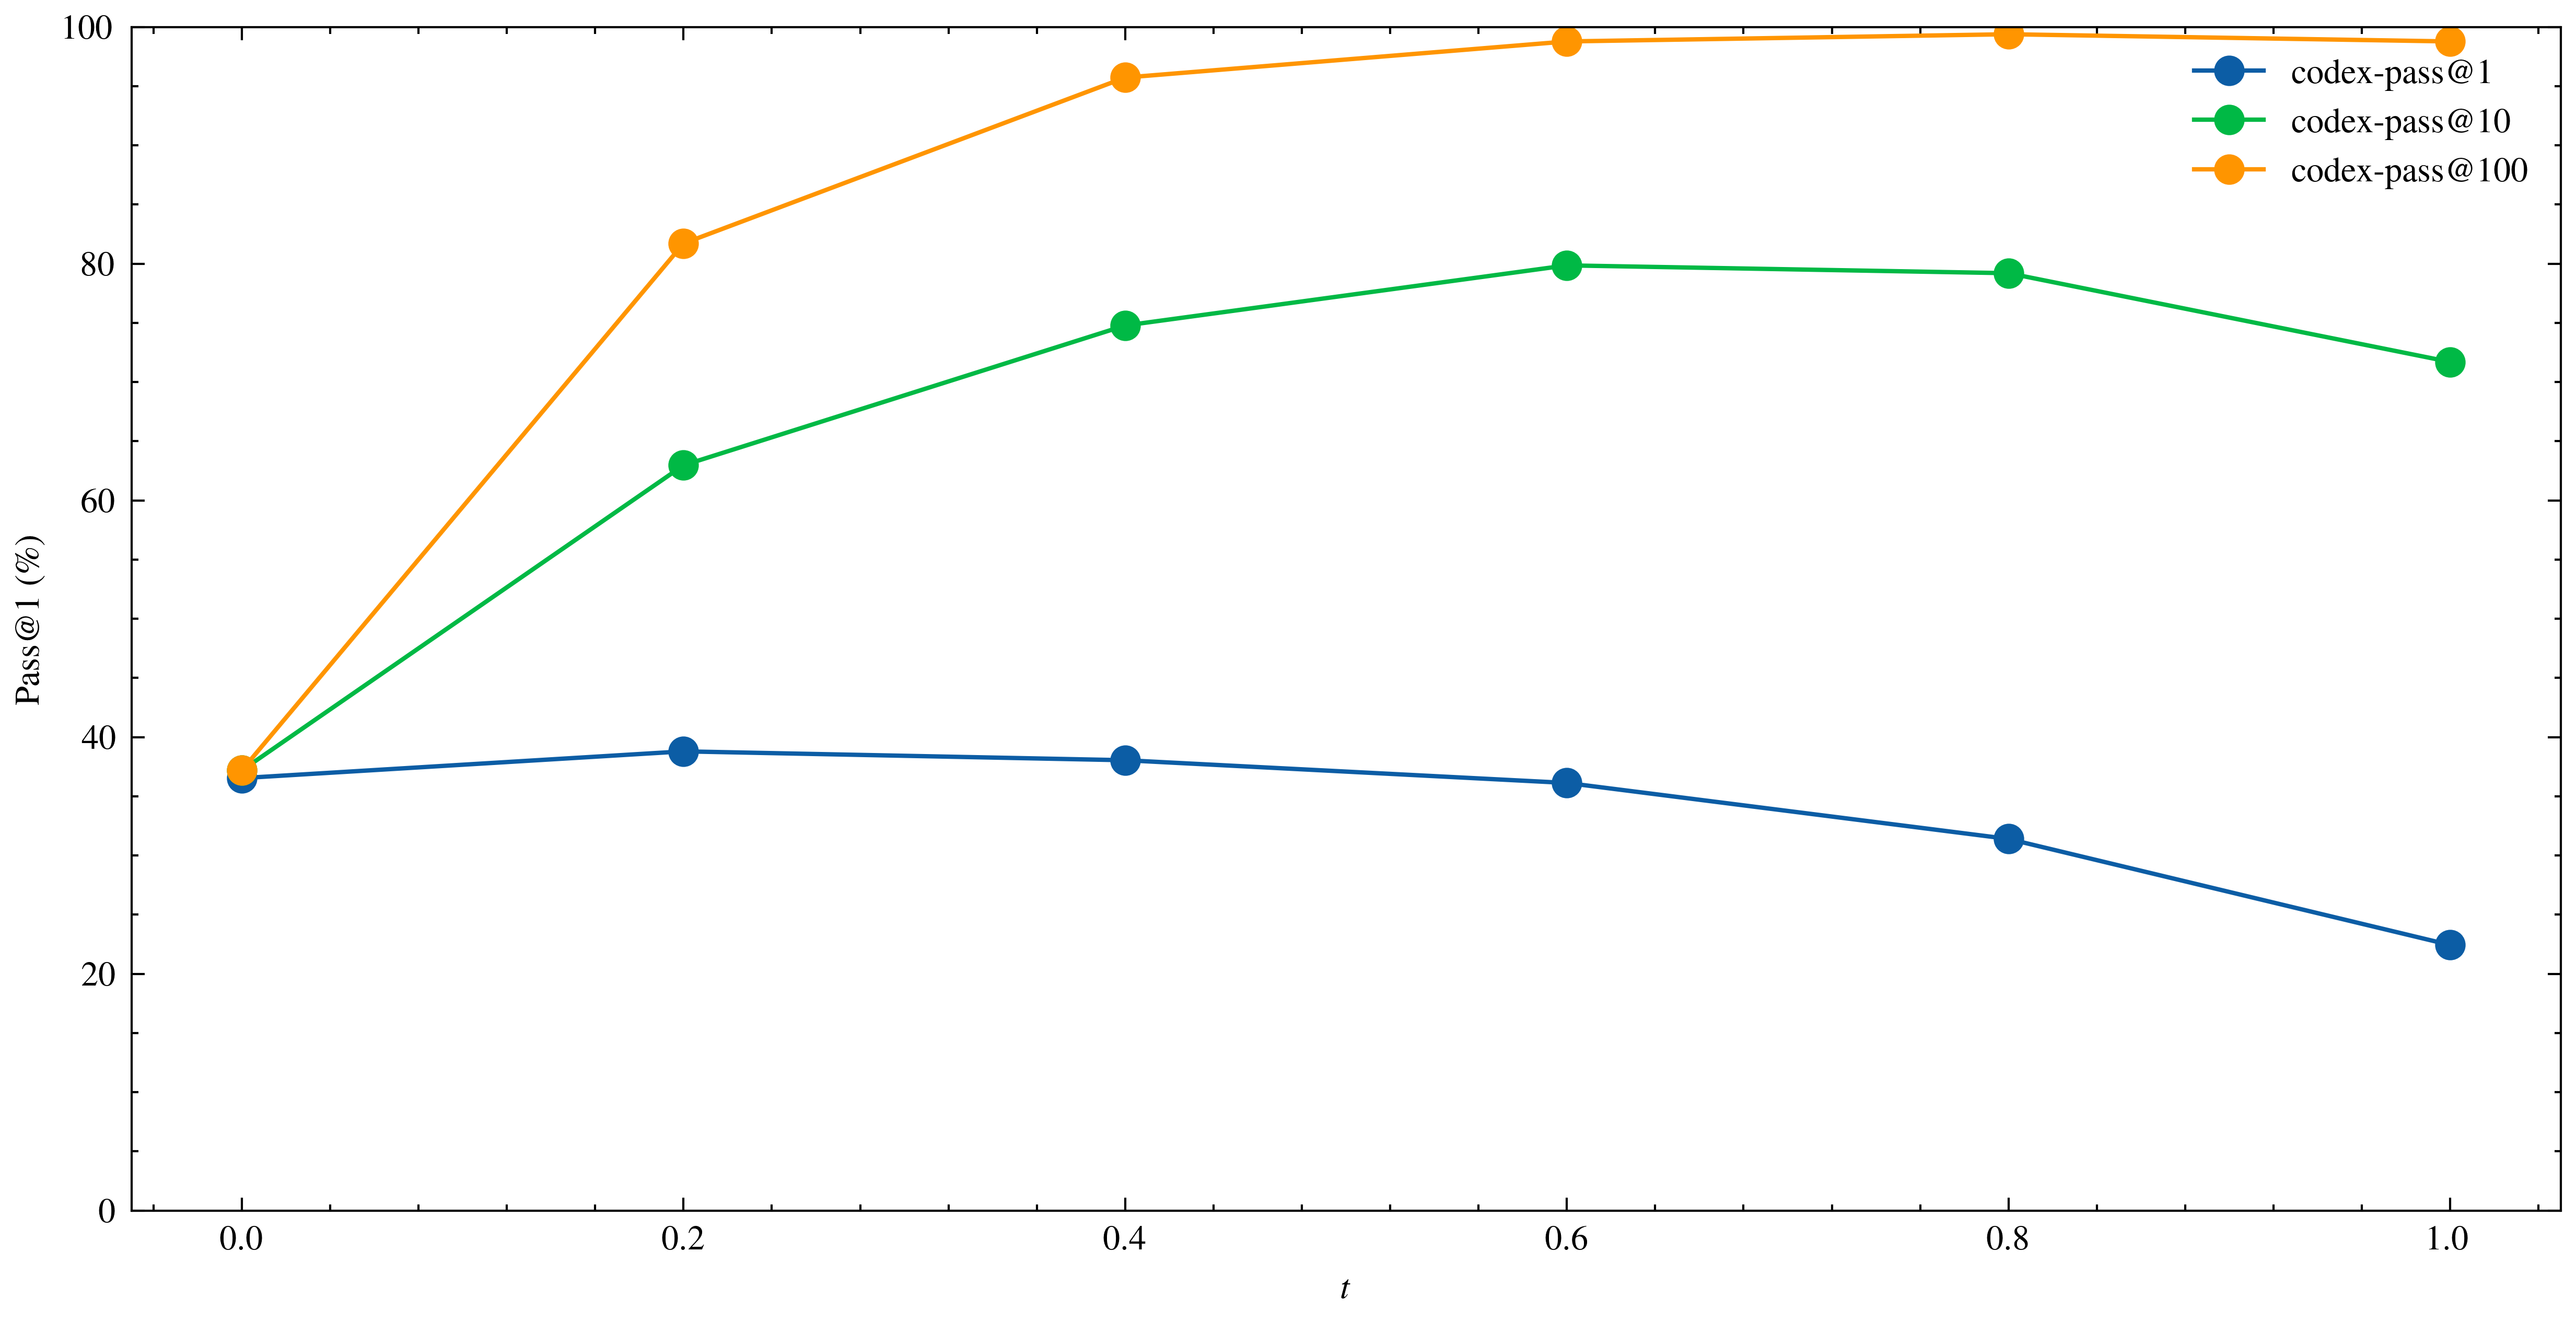

In [21]:
data = {
    'codex-pass@1': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'codex-pass@10': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,10)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'codex-pass@100': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,100)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
}

df = pd.DataFrame(data)
df.plot(kind='line', figsize=(10,5), ylim=(0,100), marker='o')
plt.xlabel('$t$')
plt.ylabel('Pass@1 (\%)')
plt.show()

##### temperature, mutation variation with HumanEval pass@100 codex

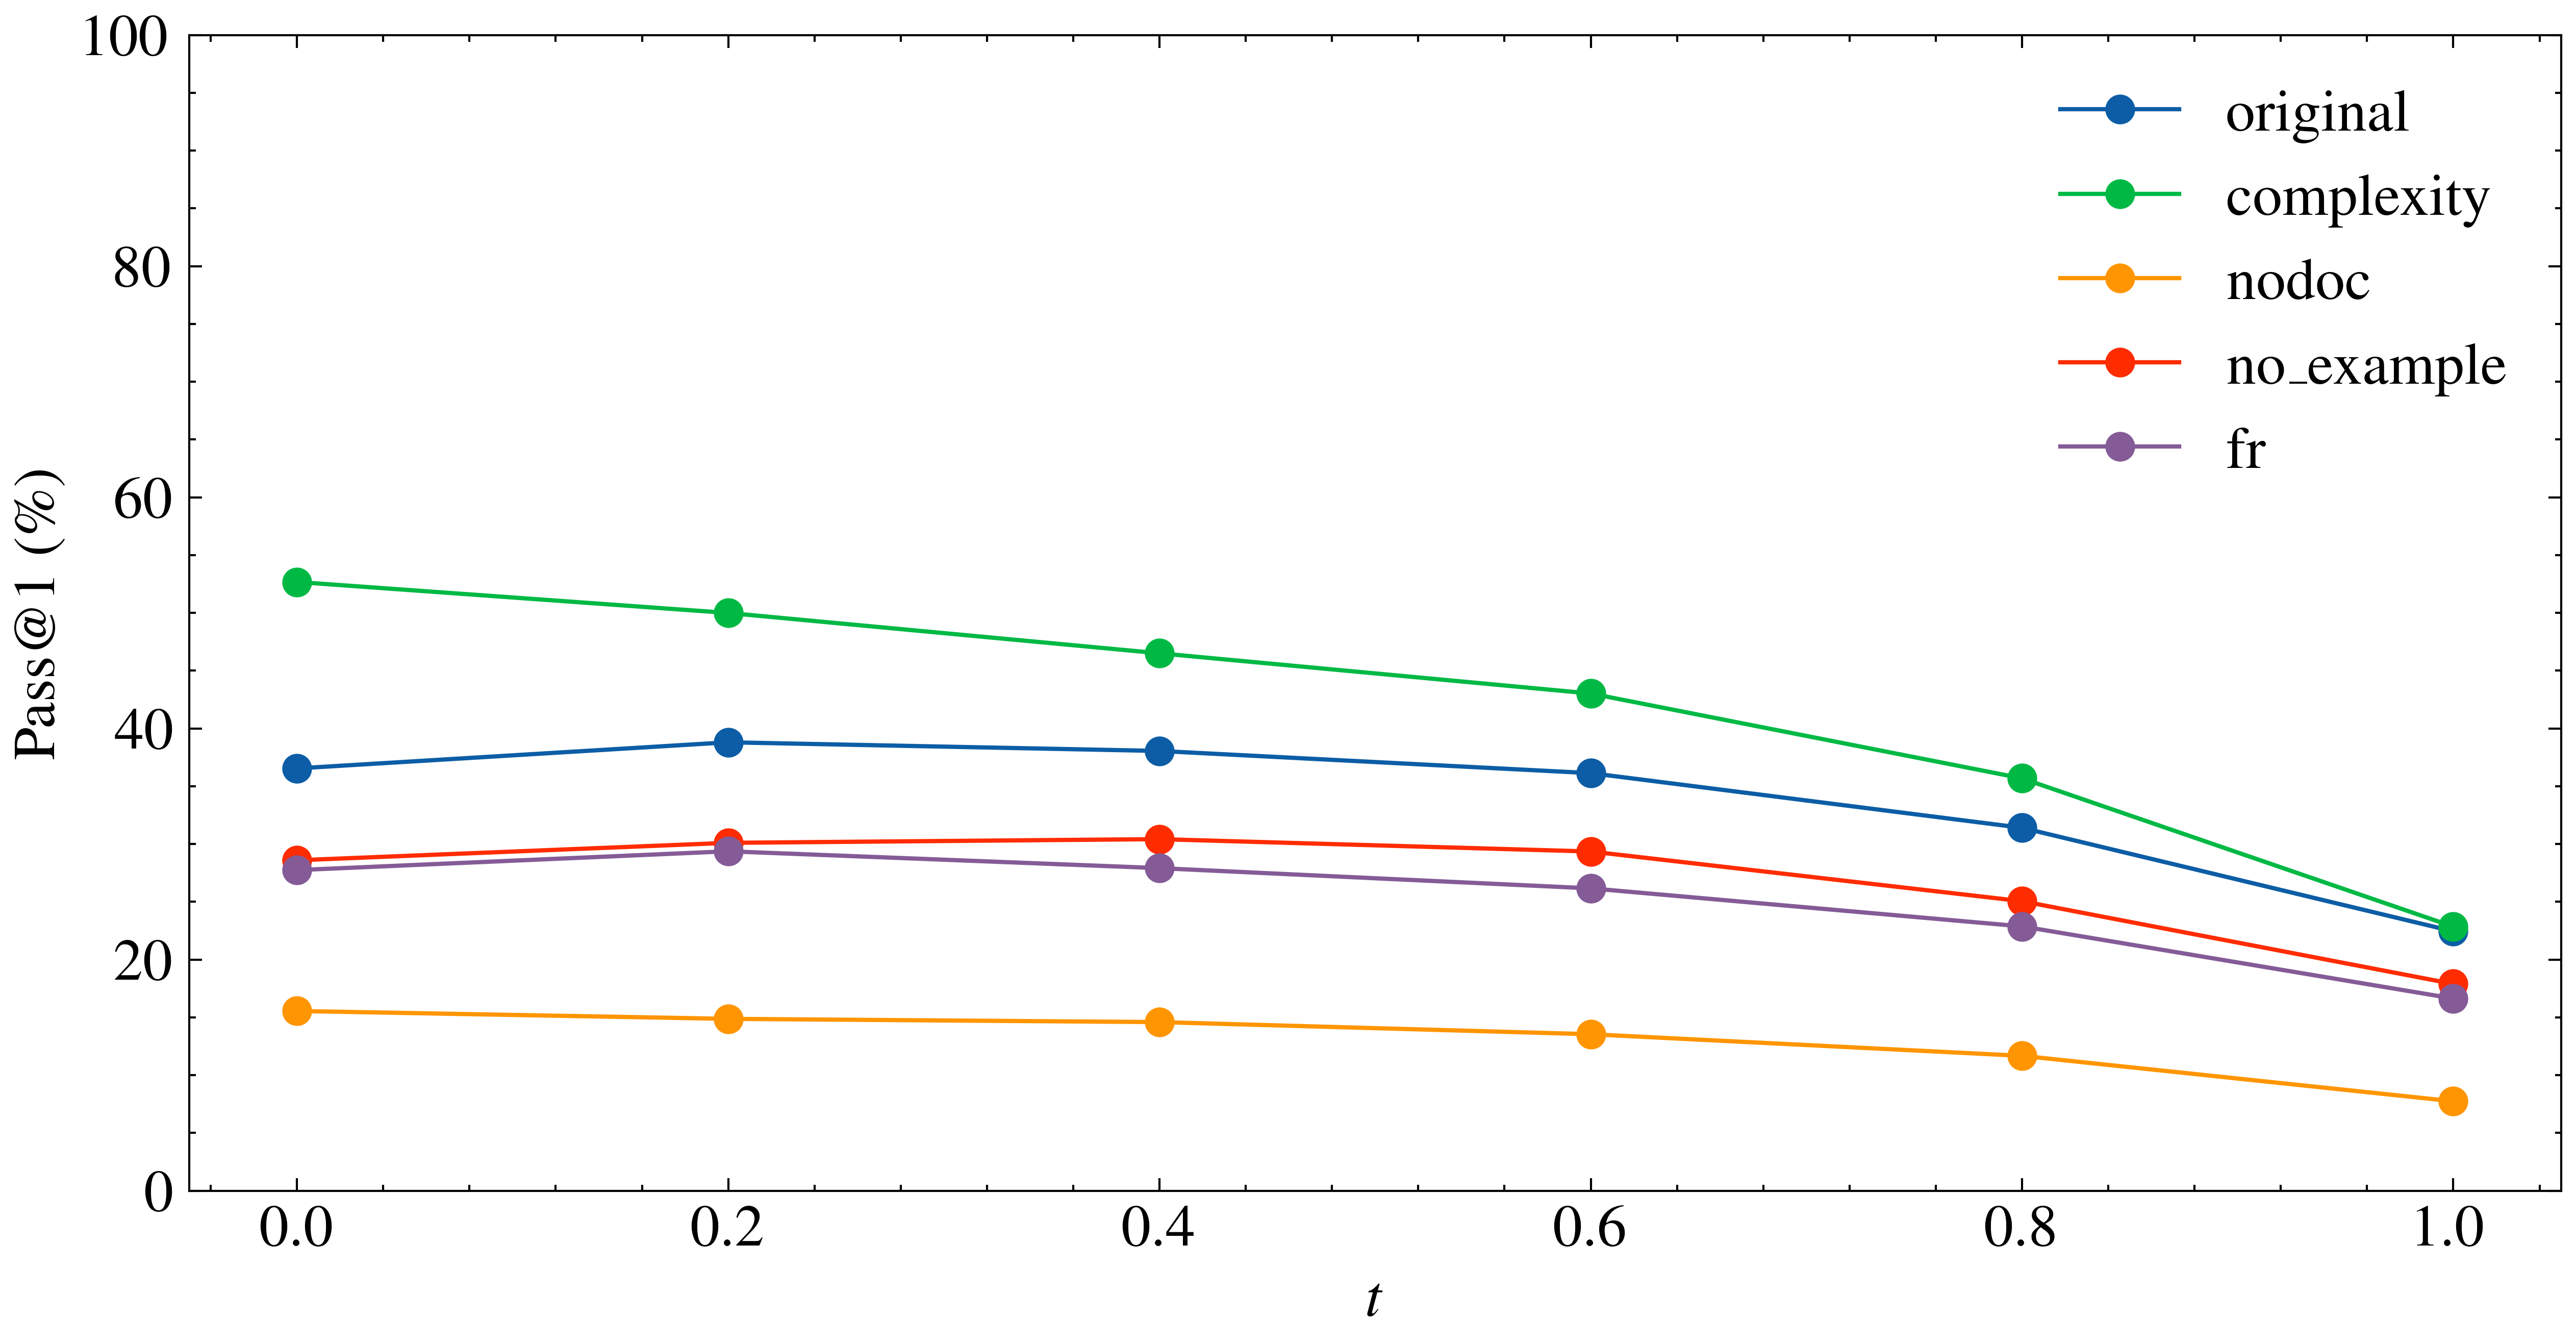

In [47]:
data = {
    'original': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'complexity': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['complexity.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'complexity.json' in humaneval[temperature]['codex_100']
    },
    'nodoc': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['nodoc.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'nodoc.json' in humaneval[temperature]['codex_100']
    },
    'no_example': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['no_example.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'no_example.json' in humaneval[temperature]['codex_100']
    },
    'fr': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['fr.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'fr.json' in humaneval[temperature]['codex_100']
    },
}

df = pd.DataFrame(data)
df.plot(kind='line', figsize=(10,5), ylim=(0,100), marker='o')
plt.xlabel('$t$')
plt.ylabel('Pass@1 (\%)')
plt.show()

#### HumanEval with prompt variation

cf [this section](#pass@1(%)-of-Copilot&Codex-on-several-modification-of-HumanEval)

#### Leetcode with Codex temperature variation

Text(0, 0.5, 'pass@k(\\%)')

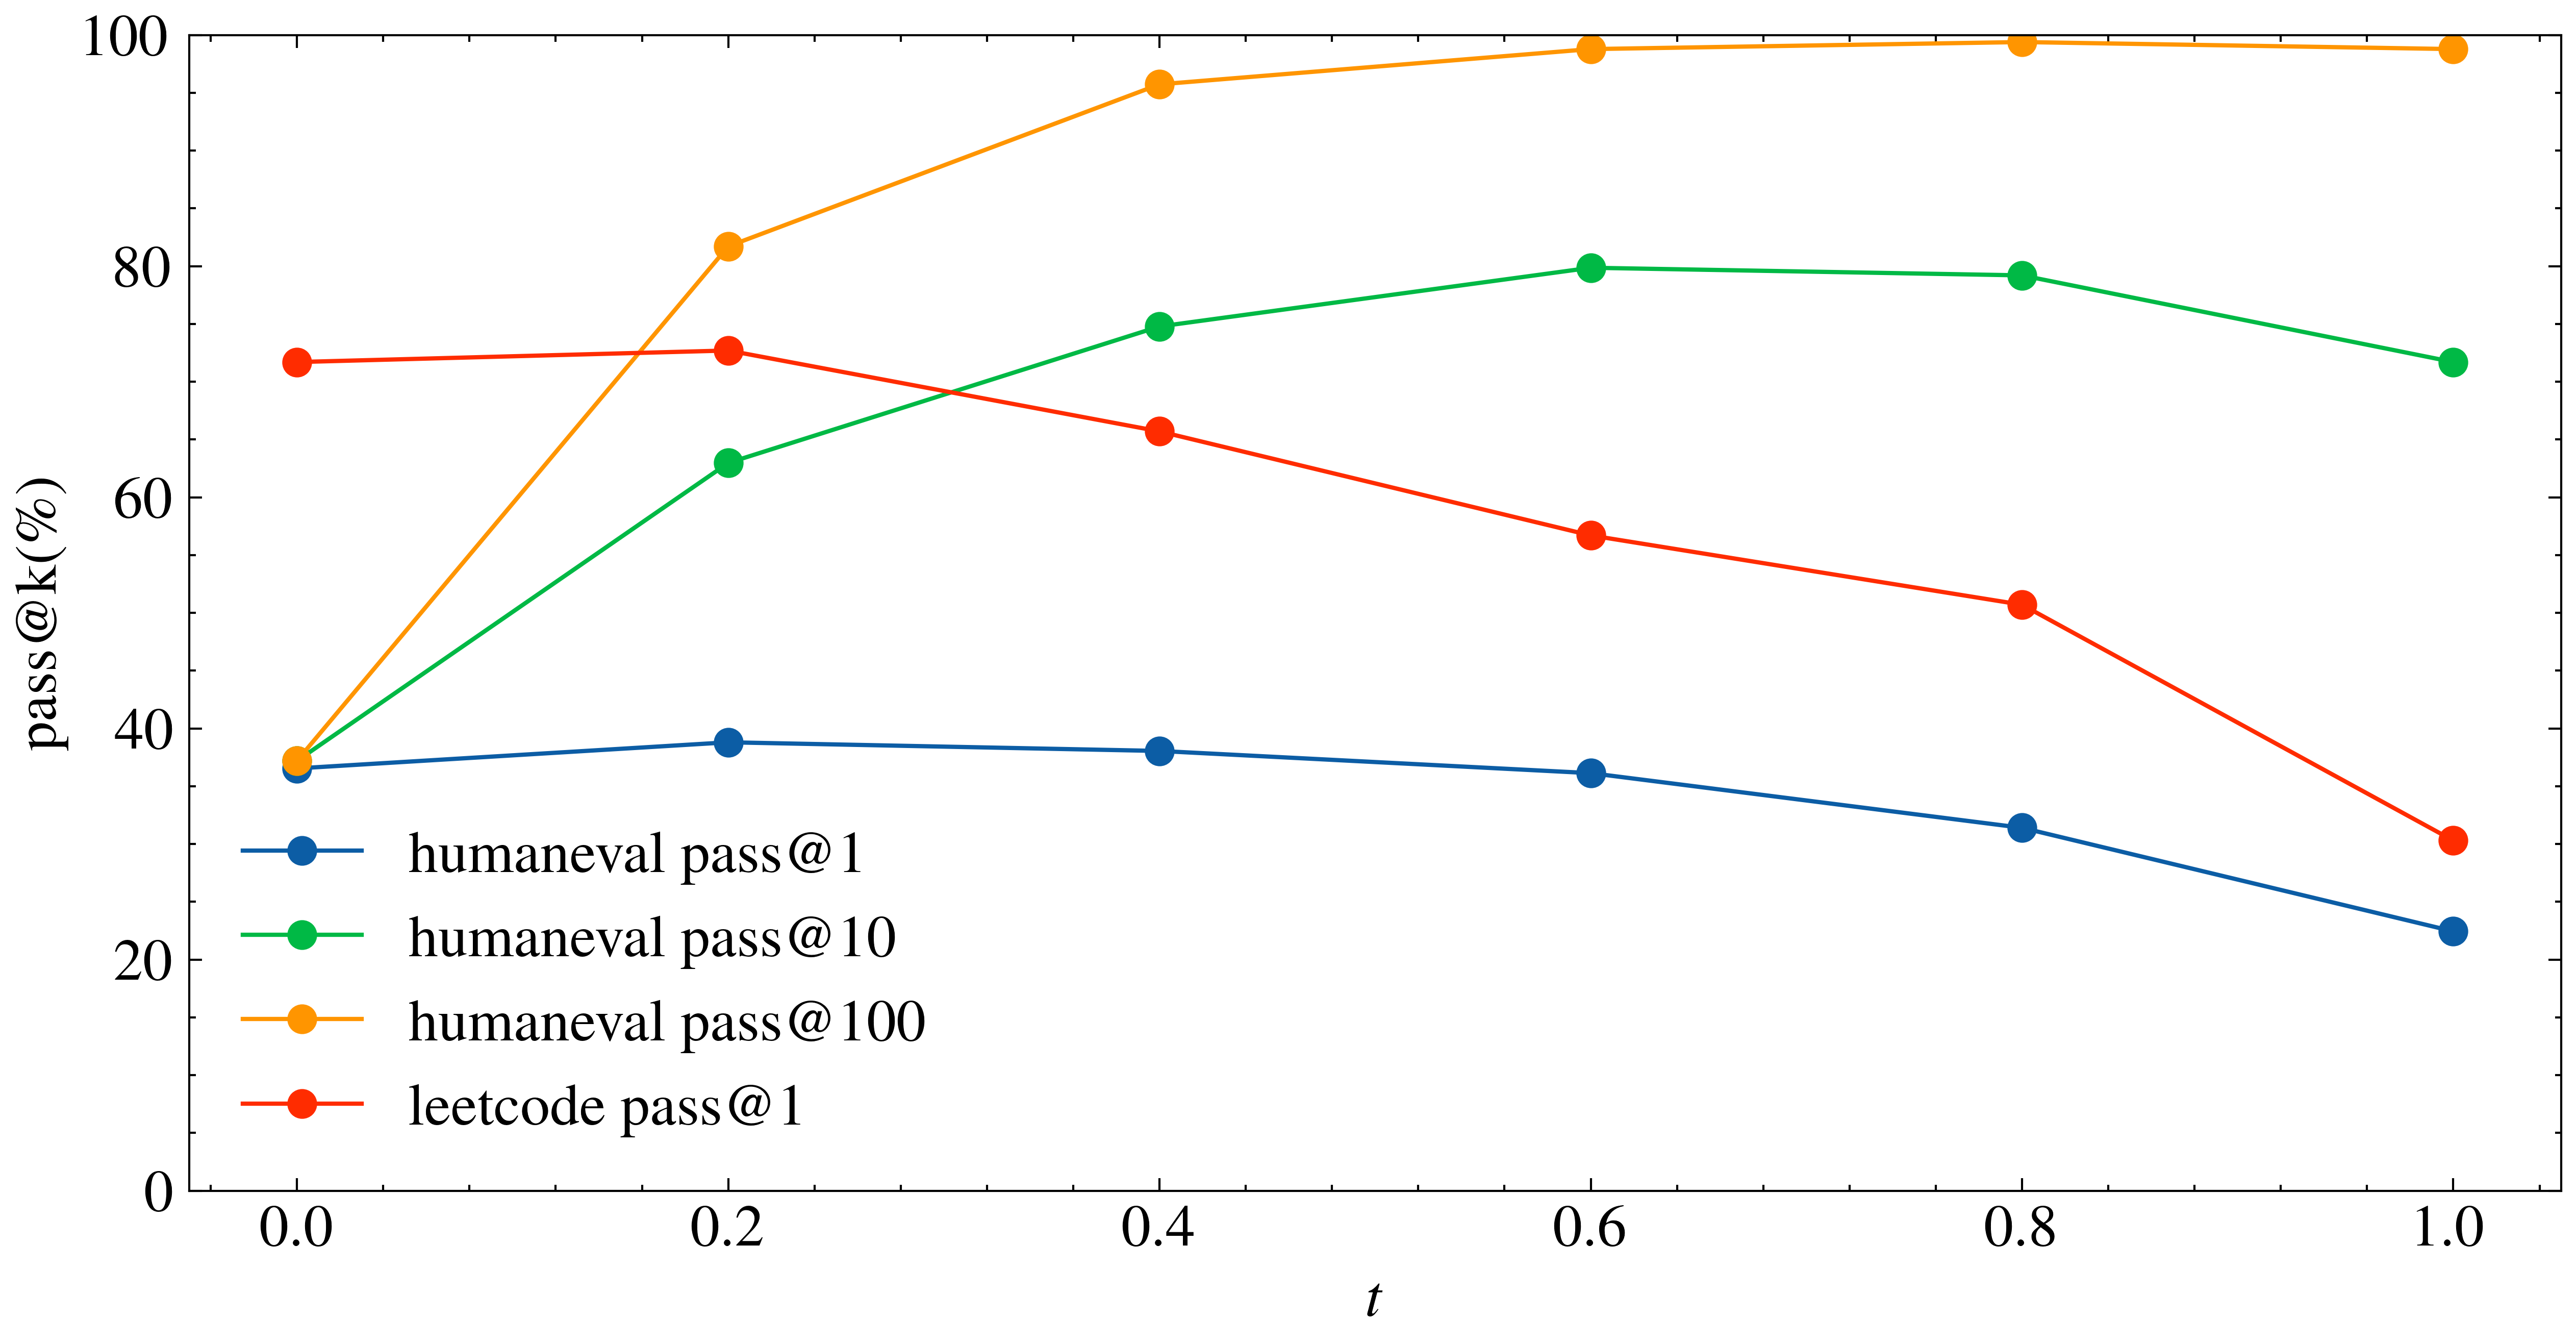

In [50]:
data = {}

data = {
    'humaneval pass@1': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,1)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'humaneval pass@10': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,10)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'humaneval pass@100': {
        temperature:
        round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100']['original.json'].values()],100,100)), 2)
        for temperature in sorted(humaneval.keys()) if 'original.json' in humaneval[temperature]['codex_100']
    },
    'leetcode pass@1': {}
}

for temp in sorted(leetcode.keys()):
    lang = 'python3'
    accepted = 0
    for problem in leetcode[temp]['codex']['original'][lang]:
        if leetcode[temp]['codex']['original'][lang][problem]['status_msg'] == 'Accepted':
            accepted += 1
    data['leetcode pass@1'][temp] = round((accepted/len(leetcode[temp]['codex']['original'][lang]))*100, 1)
            
df = pd.DataFrame(data)
#df =df.transpose()
df.plot(kind='line', figsize=(10,5), ylim=(0,100), marker='o')
plt.xlabel('$t$')
plt.ylabel('pass@k(\%)')

### Comparaison des tendances selon le dataset

Text(0, 0.5, 'Pass@1 (\\%)')

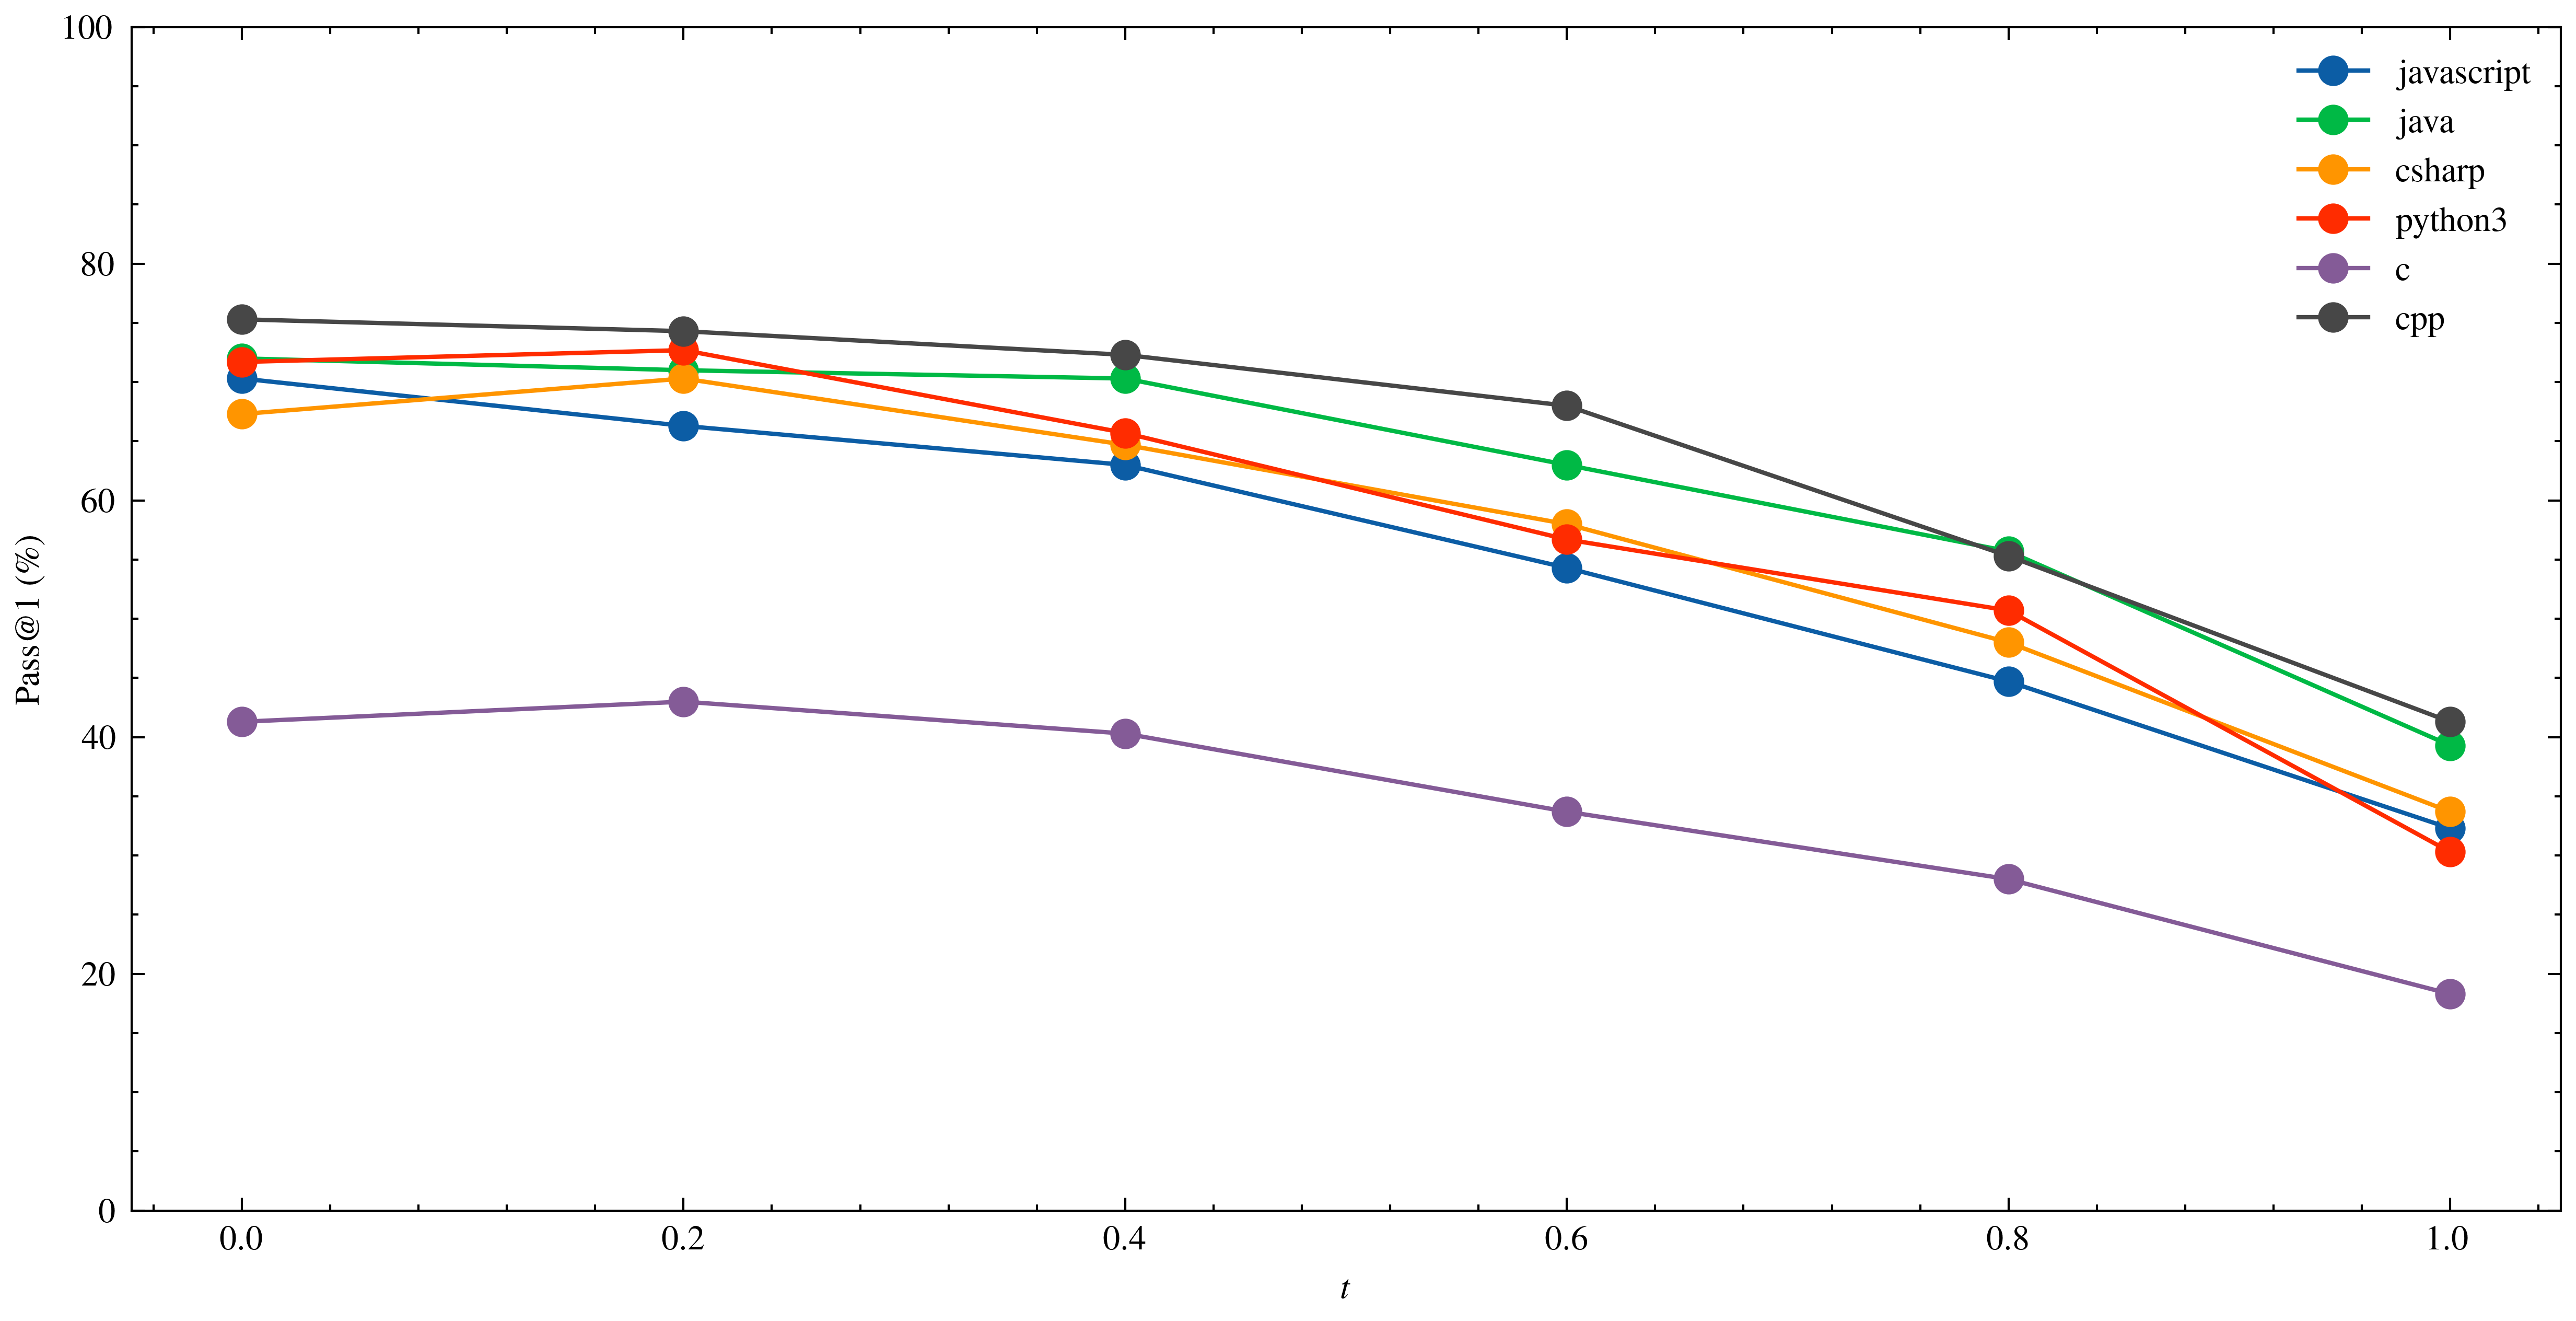

In [83]:
data = {}
for temp in sorted(leetcode.keys()):
    data[temp] = {}
    for lang in leetcode[temp]['codex']['original']:
            accepted = 0
            for problem in leetcode[temp]['codex']['original'][lang]:
                if leetcode[temp]['codex']['original'][lang][problem]['status_msg'] == 'Accepted':
                    accepted += 1
            data[temp][lang] = round((accepted/len(leetcode[temp]['codex']['original'][lang]))*100, 1)
            
df = pd.DataFrame(data)
df =df.transpose()
# dot on value, fixed y axis
df.plot(kind='line', figsize=(10,5), ylim=(0,100), marker='o')
plt.xlabel('$t$')
plt.ylabel('Pass@1 (\%)')

### prompt, temperature, pass@k on HumanEval Codex

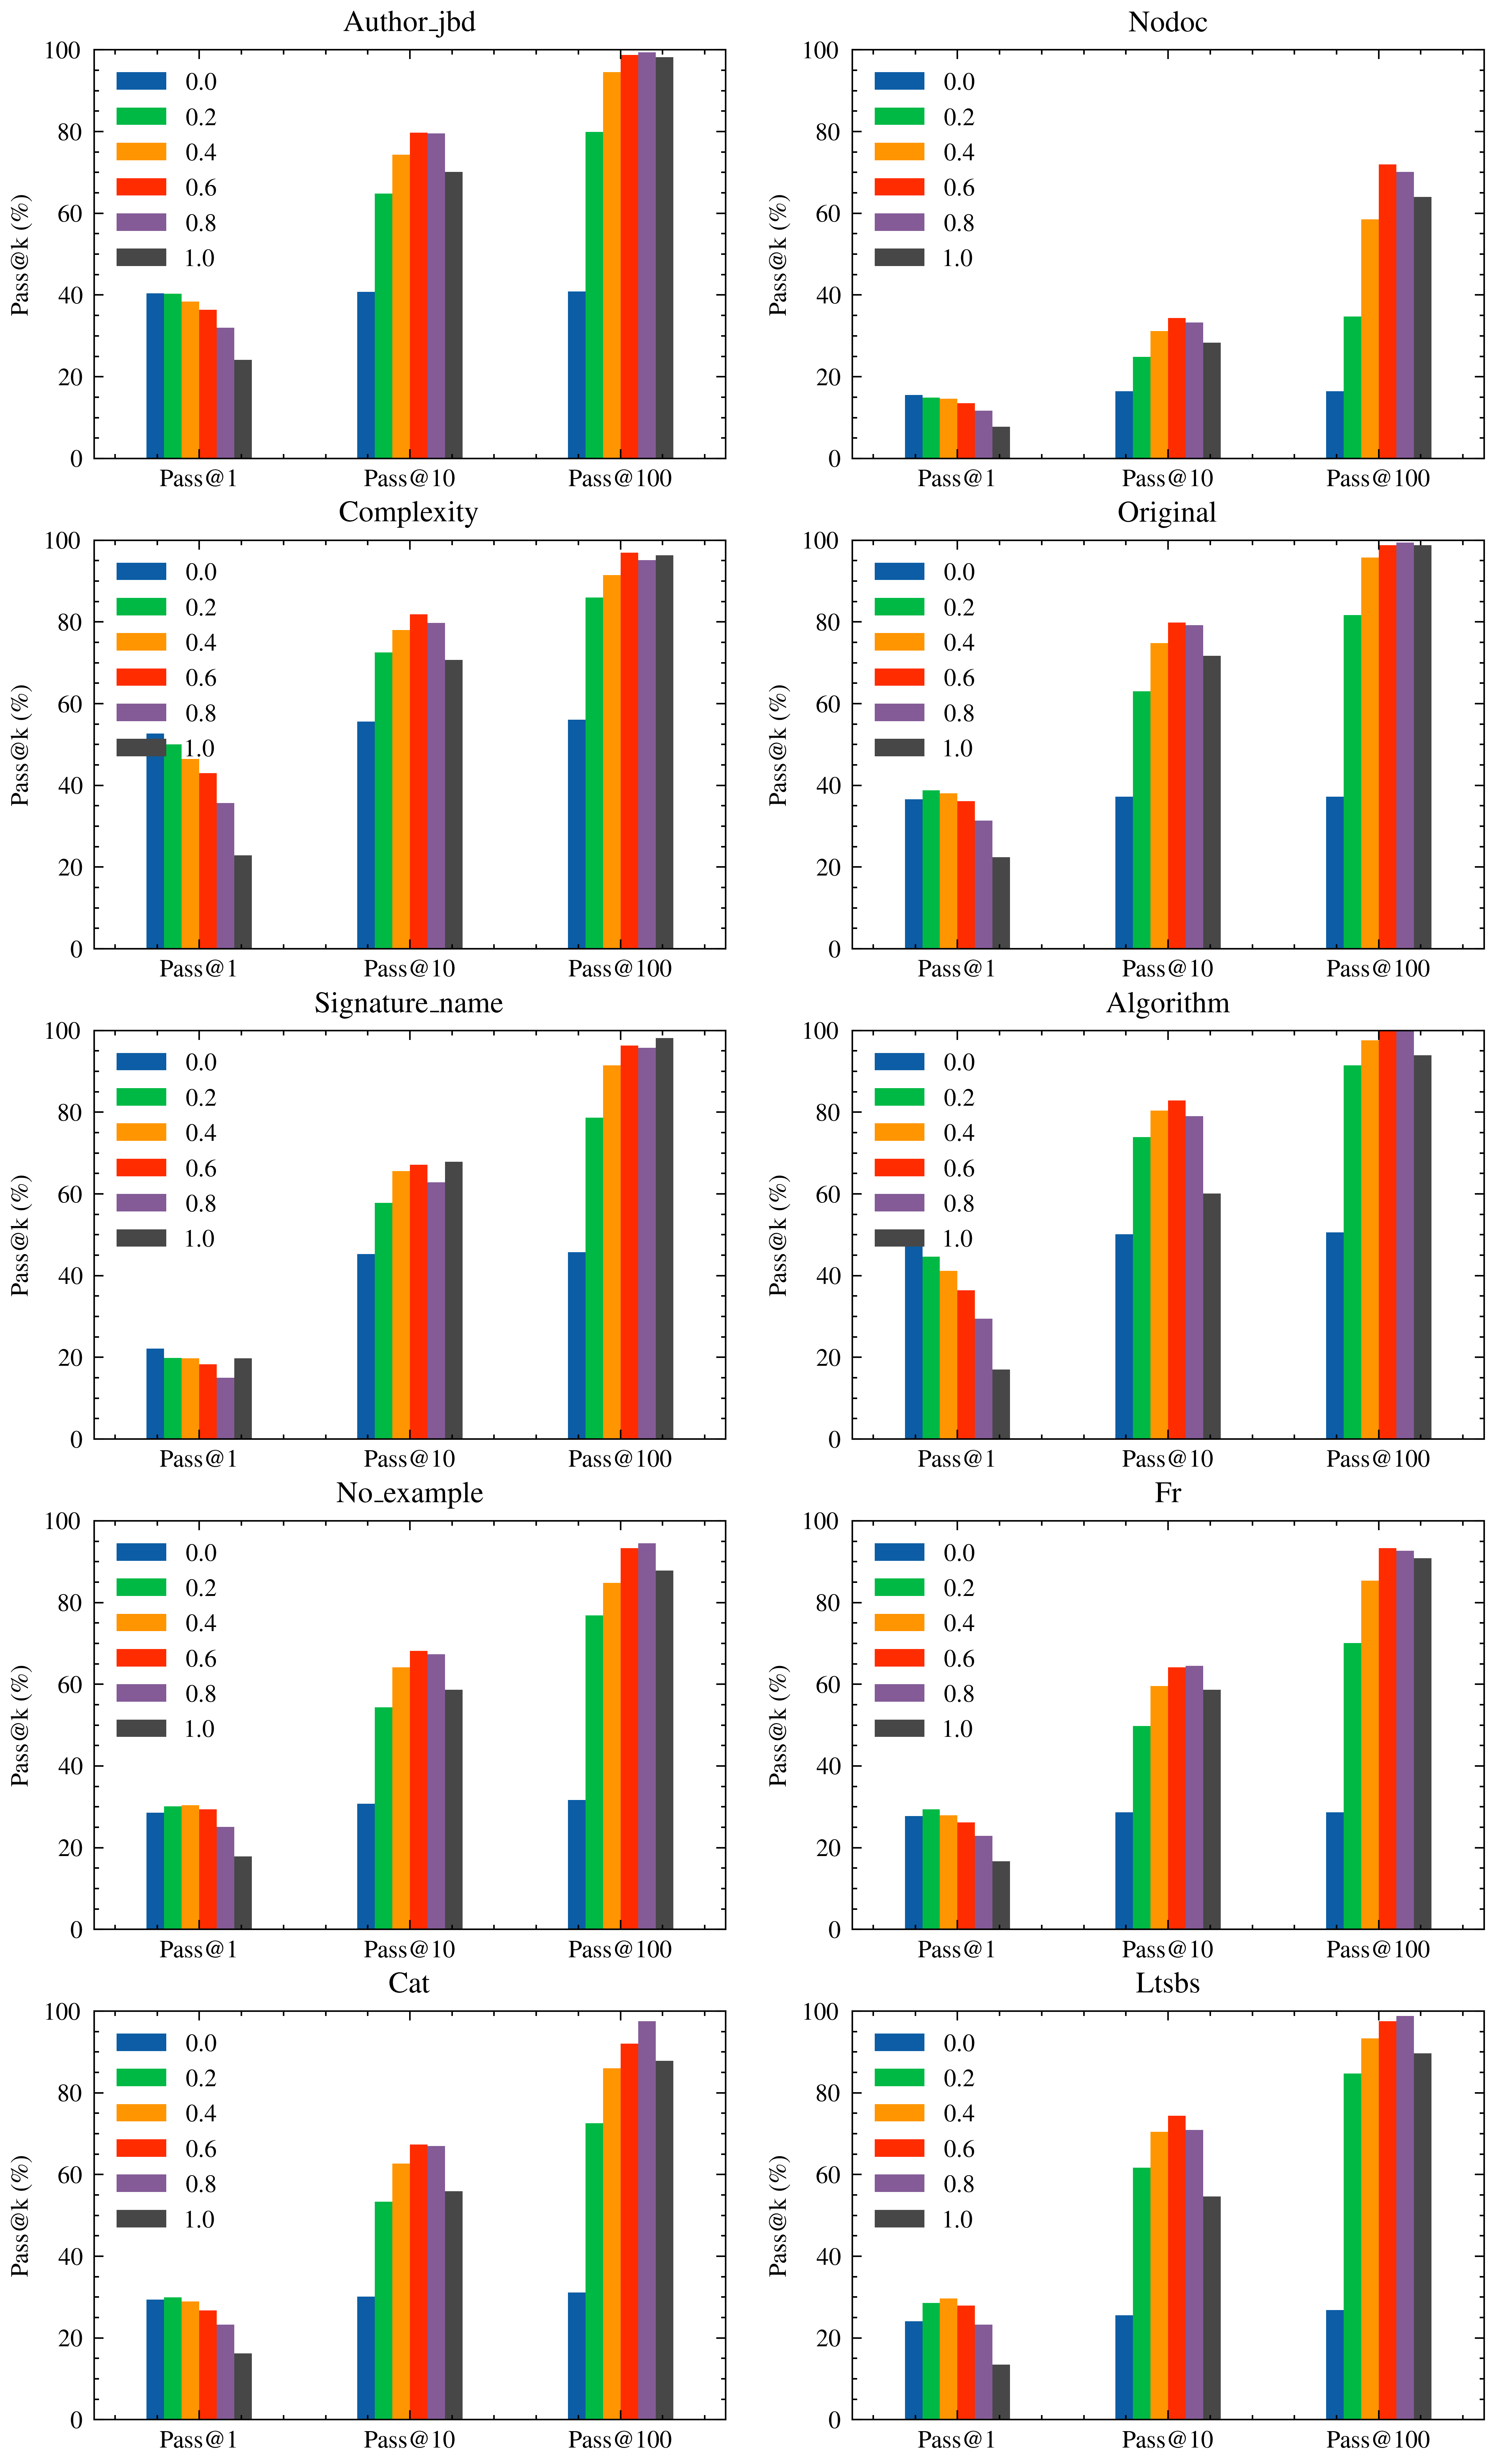

In [116]:
variations = list(humaneval['1.0']['codex_100'].keys())[0:10]
data = {}

for variation in variations:
    data[variation] = {}
    for score, score_name in [(1,'pass@1'), (10,'pass@10'), (100,'pass@100')]:
        data[variation][score_name] = {
            temperature:
            round(100*(pass_k([p['total'] for p in humaneval[temperature]['codex_100'][variation].values()],100,score)), 2)
            for temperature in sorted(humaneval.keys()) if variation in humaneval[temperature]['codex_100']
        }

fig, axes = plt.subplots(nrows=5, ncols=2)



for ax, variation in zip(list(axes.flatten()), variations):
    pd.DataFrame(data[variation]).transpose().plot(ax=ax, kind='bar', figsize=(8,14), ylim=(0,100))
    ax.set_xticklabels(['Pass@1', 'Pass@10', 'Pass@100'], rotation = 0)
    ax.set_ylabel('Pass@k (\%)')
    ax.set_title(variation.replace('.json','').capitalize())


plt.show()

#### prompt, temperature, pl variation on Leetcode Codex pass@1

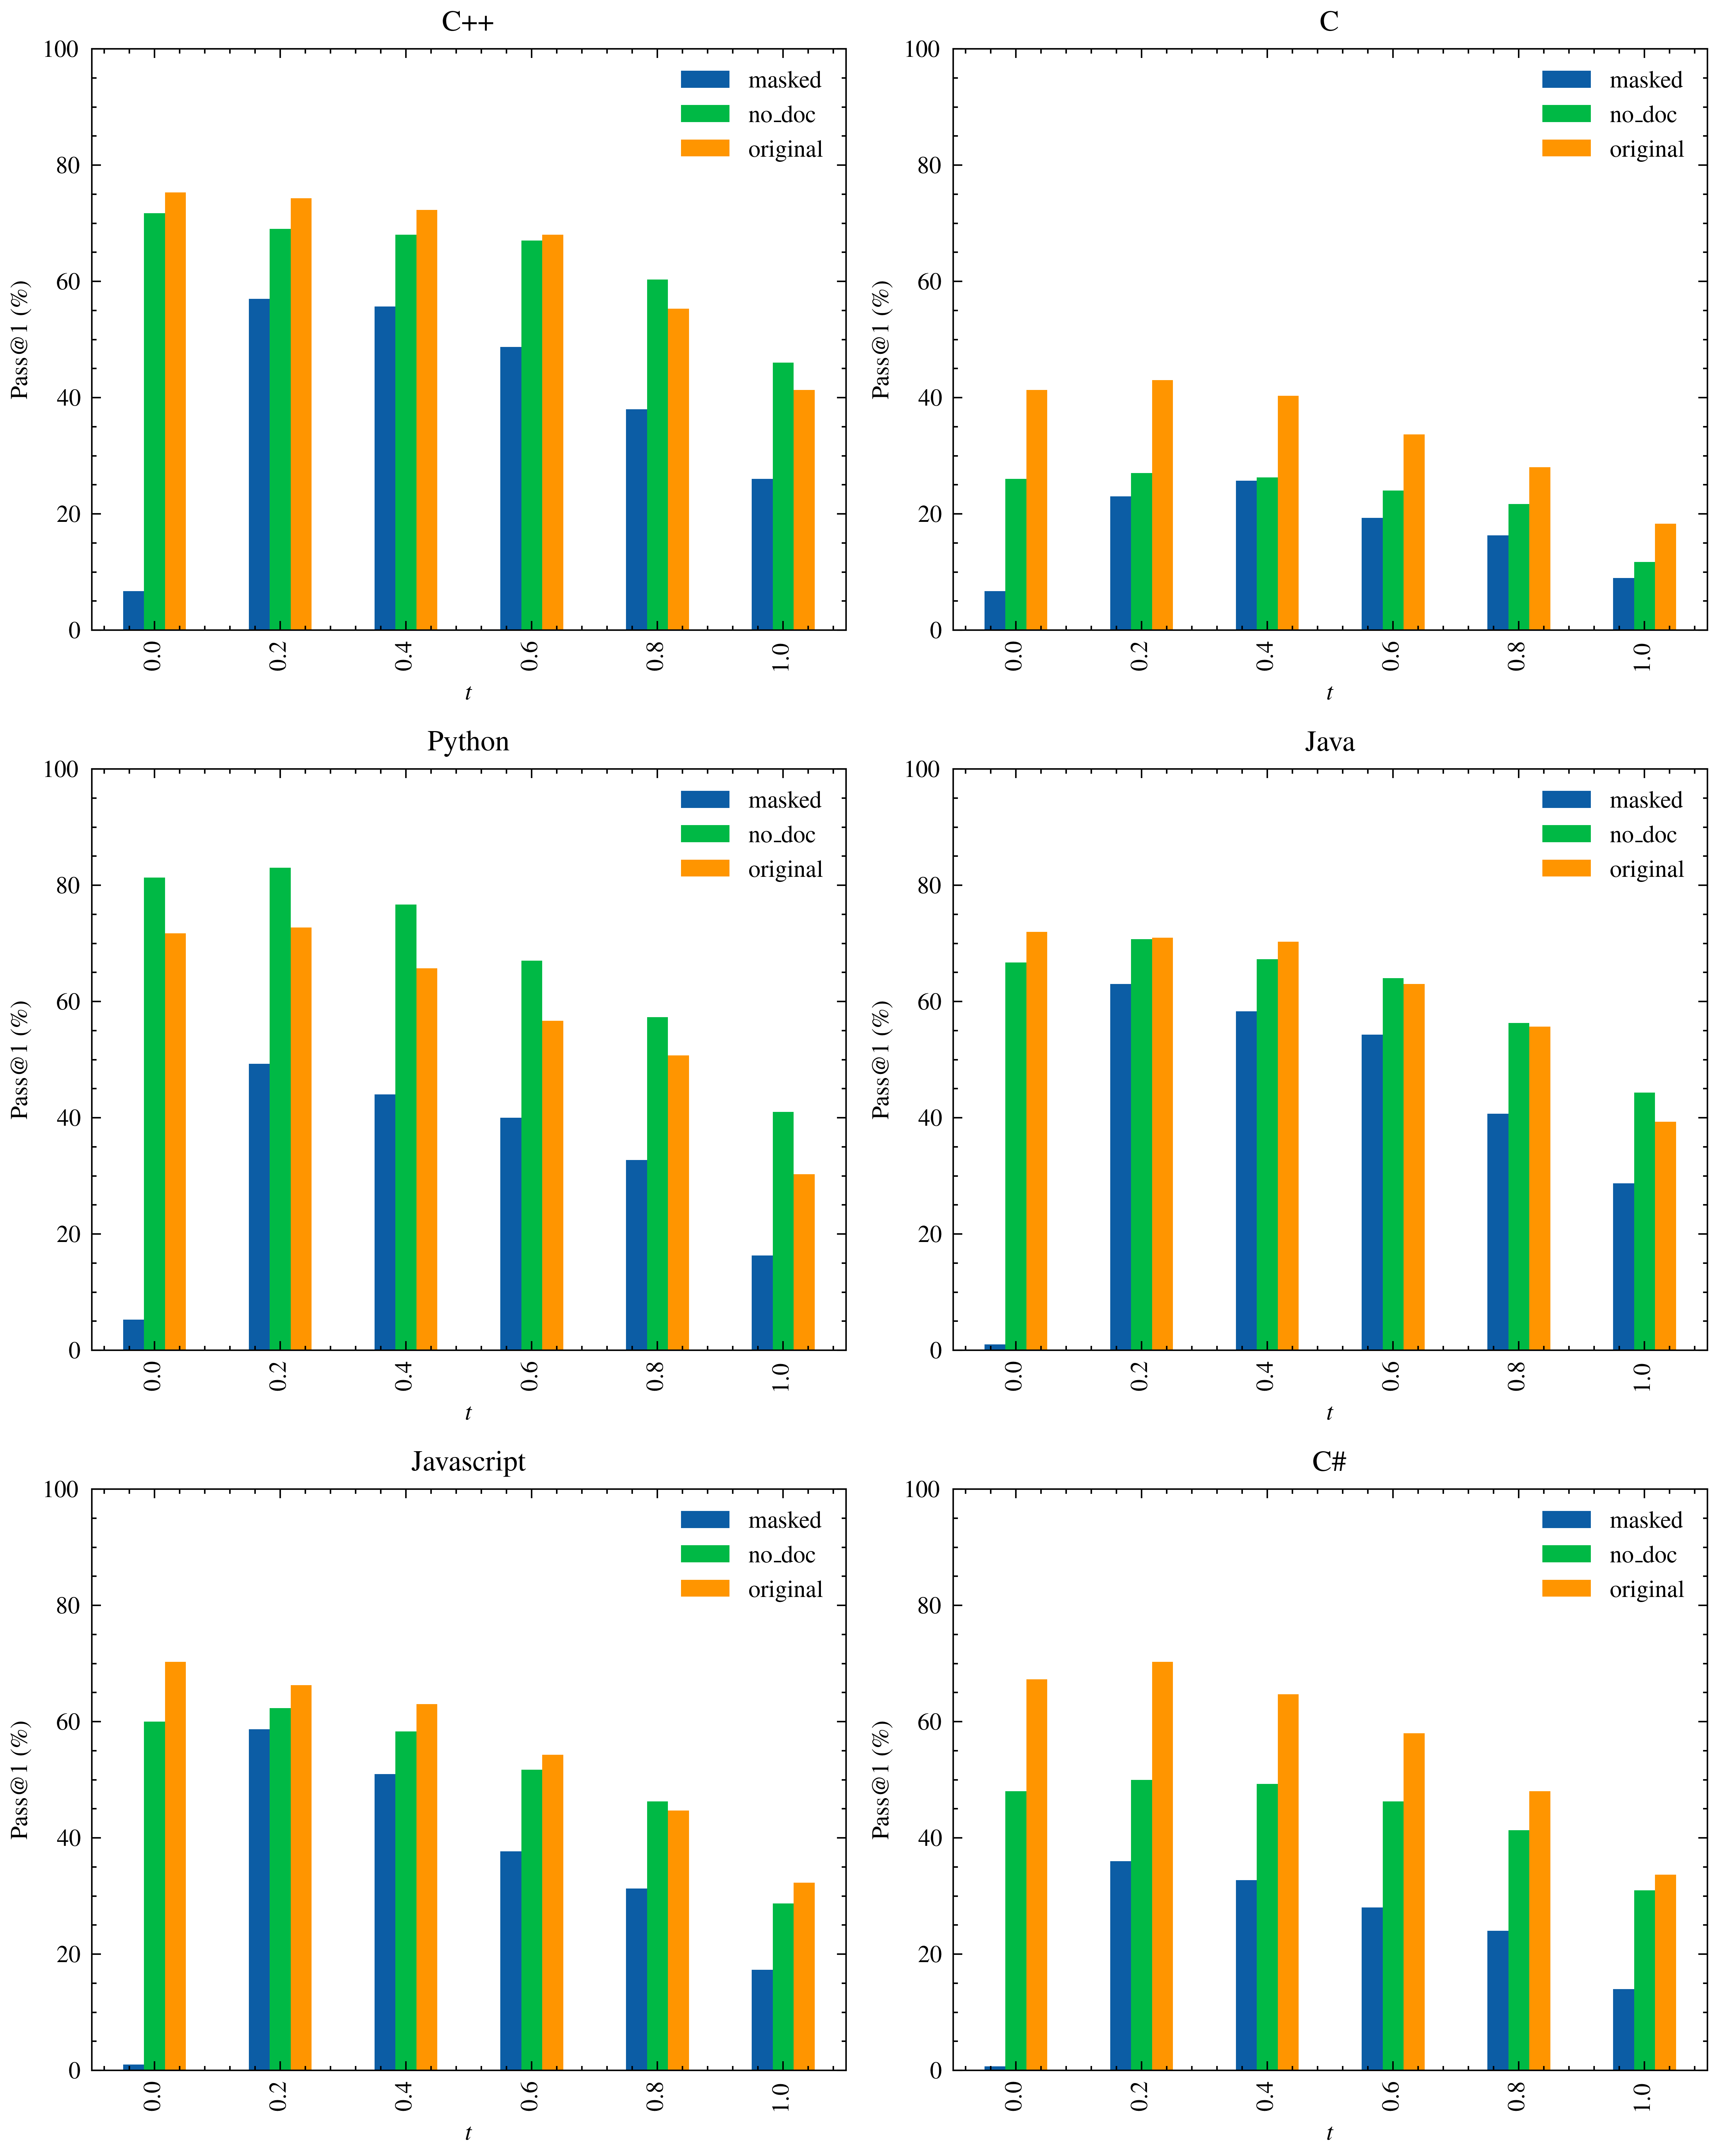

In [24]:
data = {}
for lang in ['cpp', 'c', 'python3', 'java', 'javascript', 'csharp']:
    data[lang] = {}
    for temp in sorted(leetcode.keys()):
        data[lang][temp] = {}
        for modif in leetcode[temp]['codex']:
                accepted = 0
                for problem in leetcode[temp]['codex'][modif][lang]:
                    if leetcode[temp]['codex'][modif][lang][problem]['status_msg'] == 'Accepted':
                        accepted += 1
                data[lang][temp][modif] = round((accepted/len(leetcode[temp]['codex'][modif][lang]))*100, 1)

fig, axes = plt.subplots(nrows=3, ncols=2)

pretty_name = {
    'cpp':'C++', 'c':'C', 'python3':'Python', 'java':'Java', 'javascript':'Javascript', 'csharp':'C\#'
}

for lang, ax in zip([
        'cpp', 'c', 'python3', 'java', 'javascript', 'csharp'
    ],
    [
        axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0], axes[2,1],
    ]):
    

    pd.DataFrame(data[lang]).transpose().plot(ax=ax, kind='bar', figsize=(8,10), ylim=(0,100))
    ax.set_xlabel('$t$')
    ax.set_ylabel('Pass@1 (\%)')
    ax.set_title(pretty_name[lang])



plt.tight_layout()
plt.rcParams.update({'font.size': 14})
#plt.savefig('plots/leetcode_pass1_codex|variation_temp_pl.png')
plt.show()

### Oracle

#### Oracle par pass@k (considere que l'on a fait les requetes en parallele)

Cette approche est réaliste dans le sens où elle pourrait etre utilisé

###### 3 pass@k sans composition

In [41]:
data = {'pass@1':{},'pass@10':{},'pass@100':{}}
for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']:
    for var in humaneval['1.0']['codex_100'].keys():
        variation_name = f"{t}_{var}"
        nd = []
        for key in humaneval[t]['codex_100']['original.json'].keys():
            nd.append(humaneval[t]['codex_100'][var][key]['total'])
        data['pass@1'][variation_name] = round(100*(pass_k(nd,100,1)), 2)
        data['pass@10'][variation_name] = round(100*(pass_k(nd,100,10)), 2)
        data['pass@100'][variation_name] = round(100*(pass_k(nd,100,100)), 2)

df = pd.DataFrame(data).sort_values(by=['pass@100'], ascending=False)
display(df)

,pass@1,pass@10,pass@100
0.6_author_ap.json,38.15,80.53,100.00
0.6_algorithm.json,36.44,82.84,100.00
0.8_algorithm.json,29.46,78.99,100.00
0.8_author_ap.json,33.28,80.29,99.39
0.8_original.json,31.40,79.20,99.39
...,...,...,...
0.0_no_example.json,28.59,30.80,31.71
0.0_cat.json,29.35,30.12,31.10
0.0_fr.json,27.74,28.66,28.66
0.0_ltsbs.json,24.13,25.53,26.83


###### Meilleurs dans les 3 pass@k avec composition

In [72]:
a = [(t,vari) for vari in humaneval['1.0']['codex_100'].keys() for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']]
len(list(itertools.combinations(a, 4)))


In [82]:
data = {'pass@2':{},'pass@10':{},'pass@100':{}}

variations = [(t,vari) for vari in humaneval['1.0']['codex_100'].keys() for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']]

for k in [1,2]:
    print(f"Process of combination of {k} with {len(list(itertools.combinations(variations, k)))} cases")
    
    f = IntProgress(
        min=0, 
        max=len(list(itertools.combinations(variations, k))),
        description=f"Computing"
    ) # instantiate the bar
    display(f) # display the bar
    for combi in itertools.combinations(variations, k):
        f.value += 1 
        variation_name = '&'.join([t +"_"+ v.replace('.json','') for t, v in combi])
        nd = []
        for key in humaneval[t]['codex_100']['original.json'].keys():
            nd.append(sum([humaneval[t]['codex_100'][variation][key]['total'] for t, variation in combi]))
        data['pass@2'][variation_name] = round(100*(pass_k(nd,k*100,2)), 2)
        data['pass@10'][variation_name] = round(100*(pass_k(nd,k*100,10)), 2)
        data['pass@100'][variation_name] = round(100*(pass_k(nd,k*100,100)), 2)

df = pd.DataFrame(data)
s1 = df.sort_values(by=['pass@2'], ascending=False).iloc[0]
s2 = df.sort_values(by=['pass@10'], ascending=False).iloc[0]
s3 = df.sort_values(by=['pass@100'], ascending=False).iloc[0]
df2 = pd.concat([s1, s2, s3], axis=1).transpose()
display(df2)

Process of combination of 1 with 66 cases


IntProgress(value=0, description='Computing', max=66)

Process of combination of 2 with 2145 cases


IntProgress(value=0, description='Computing', max=2145)

,pass@2,pass@10,pass@100
0.2_complexity&0.2_algorithm,59.67,77.87,92.23
0.6_complexity&0.6_algorithm,55.37,83.61,98.79
0.6_author_ap,52.13,80.53,100.00


#### Oracle par probleme

Approche imaginaire où on considere que la meilleur modif à été faites pour chaque problème

Selon la température : 

In [38]:
data = {'pass@1':{},'pass@10':{},'pass@100':{}}
for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']:
    nd = []
    for key in humaneval[t]['codex_100']['original.json'].keys():
        m = 0
        for var in humaneval['1.0']['codex_100'].keys():
            if humaneval[t]['codex_100'][var][key]['total'] > m:
                m = humaneval[t]['codex_100'][var][key]['total']
        nd.append(m)
    data['pass@1'][t] = round(100*(pass_k(nd,100,1)), 2)
    data['pass@10'][t] = round(100*(pass_k(nd,100,10)), 2)
    data['pass@100'][t] = round(100*(pass_k(nd,100,100)), 2)

df = pd.DataFrame(data)
display(df)

,pass@1,pass@10,pass@100
0.0,73.09,77.23,77.44
0.2,63.39,89.25,98.78
0.4,54.89,90.46,100.00
0.6,48.52,90.65,100.00
0.8,40.15,88.98,100.00
1.0,29.09,80.46,100.00


Selon la modification :

In [36]:
data = {'pass@1':{},'pass@10':{},'pass@100':{}}
for var in humaneval['1.0']['codex_100'].keys():
    nd = []
    for key in humaneval[t]['codex_100']['original.json'].keys():
        m = 0
        for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']:
            if humaneval[t]['codex_100'][var][key]['total'] > m:
                m = humaneval[t]['codex_100'][var][key]['total']
        nd.append(m)
    data['pass@1'][var] = round(100*(pass_k(nd,100,1)), 2)
    data['pass@10'][var] = round(100*(pass_k(nd,100,10)), 2)
    data['pass@100'][var] = round(100*(pass_k(nd,100,100)), 2)

df = pd.DataFrame(data)
display(df)

,pass@1,pass@10,pass@100
author_jbd.json,52.93,84.76,100.00
nodoc.json,20.23,40.08,89.63
complexity.json,62.98,86.63,98.17
original.json,50.15,84.81,100.00
signature_name.json,29.42,78.09,99.39
algorithm.json,59.13,87.29,100.00
no_example.json,41.82,73.94,98.78
fr.json,38.85,72.70,98.78
cat.json,41.07,73.74,98.17
ltsbs.json,43.07,80.32,100.00


Les deux à la fois : 

In [37]:
data = {'pass@1':{},'pass@10':{},'pass@100':{}}
nd = []

for key in humaneval['1.0']['codex_100']['original.json'].keys():
    m = 0
    for t in ['0.0','0.2','0.4','0.6','0.8', '1.0']:
        for var in humaneval['1.0']['codex_100'].keys():
            if humaneval[t]['codex_100'][var][key]['total'] > m:
                m = humaneval[t]['codex_100'][var][key]['total']
    nd.append(m)
data['pass@1']['oracle'] = round(100*(pass_k(nd,100,1)), 2)
data['pass@10']['oracle'] = round(100*(pass_k(nd,100,10)), 2)
data['pass@100']['oracle'] = round(100*(pass_k(nd,100,100)), 2)

df = pd.DataFrame(data)
display(df)

,pass@1,pass@10,pass@100
oracle,77.5,94.61,100.0
